# Introducción 

La idea de la práctica es visitar aquellos temas que en cierta manera nos permitan ver más contenido del curso.

La práctica esta dividida en 4 o 5 subapartados, que ya tenéis en este mismo Notebook. Estos subapartados estan aquí para que rellenéis el código que hace falta para la realización de la práctica. Obviamente podéis usar tantas celdas como os hagan falta, es más es de agradecer si el código final esta algo "limpio". Usar funciones, algo de comentario, etc, etc...

Usaremos 2 datasets, uno para el primer ejercicio, y otro para el resto de ejercicios.

Ejercicios:


1.   Machine Learning vs Deep Learning (Acordaros que hay que implementar el pipeline visto en clase entero)

    1.1. Implementación de un modelo de Sentiment Analysis con algún algoritmo de Machine Learning Clásico.
    
    1.2. Implementación de un modelo de Sentiment Analysis con alguna arquitectura de Deep Learning.
    
    1.3. Breve Comparación de resultados. Confusion Matrix.
    
2. Hacer Analysis de los tweets del segundo dataset. Que temas aparecen? Como se representan estos temas? De que hablan unos y otros?

3. Escoged a uno de los dos presidentes, y escribid tweets como ellos, usando un Modelo Generativo.

En cada ejercicio, espero explicaciones y razonamientos del porque una arquitectura y no otra, por ejemplo en Deep Learning, porque usar Convolutionals en lugar de recurrentes, o en Machine Learning, Bayes en lugar de SVM. Hay que explicar el pipeline, sobretodo el preproceso de datos, con lo que habrá que hacer un pequeño estudio de que datos tenemos, y si hay cosas que se pueden ignorar, si hacéis stemming, o no, etc, etc...

Acordaros de que objetivo final no es que obtengáis una accuracy brutal, es que comprendais que pasa cuando usais un algoritmo u otro, y que problemas o beneficios nos dan.

![](https://i.pinimg.com/736x/19/63/8c/19638c0b33e2f7822d6806ce31d89d84--funny-cartoons-funny-jokes.jpg =400x)

Mucha suerte y ánimo!



# Indice




1.   [**Ejercicio 1**](#ejercicio1)
2.   [**Ejercicio 2**](#ejercicio2)
3.   [**Ejercicio 3**](#ejercicio3)






## Carga de Librerías de los ejercicios

Cargamos las librerías que necesitamos

#### Gestión de la memoria GPU en TensorFlow

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.gpu_options.per_process_gpu_memory_fraction = 0.95
config.gpu_options.visible_device_list = "0"

set_session(tf.Session(config=config))  # set this TensorFlow session as the default session for Keras

Using TensorFlow backend.


In [2]:
!pip install --upgrade tensorflow-gpu==1.13.1

Requirement already up-to-date: tensorflow-gpu==1.13.1 in /usr/local/lib/python3.6/dist-packages (1.13.1)


##### pyLDAvis

In [3]:
!pip install pyLDAvis

#### Gensim

In [4]:
!pip install gensim

#### WordCloud

In [5]:
!pip install WordCloud

#### Live Loss Plot

In [6]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

#### TextBlob

In [7]:
!pip install textblob

In [8]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


#### GraphViz

In [0]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

#### Spacy

In [10]:
!pip install spacy

In [11]:
!python -m spacy download es_core_news_md


    Linking successful
    /usr/local/lib/python3.6/dist-packages/es_core_news_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/es_core_news_md

    You can now load the model via spacy.load('es_core_news_md')



In [12]:
!python -m spacy download en_core_web_md


    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_md -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_md

    You can now load the model via spacy.load('en_core_web_md')



In [13]:
!pip install -U nltk

  Using cached https://files.pythonhosted.org/packages/6f/ed/9c755d357d33bc1931e157f537721efb5b88d2c583fe593cc09603076cc3/nltk-3.4.zip
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [14]:
!pip install stop-words

  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


#### Importación de librerías

In [15]:
# Importamos las librerías que necesitamos

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from __future__ import print_function
from nltk.stem import *
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn

from stop_words import get_stop_words

import spacy

import csv, re, warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Model
from keras.layers import Input, CuDNNLSTM, Dense, Dropout, Embedding, Bidirectional, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
from keras.utils.vis_utils import plot_model

from collections import Counter

from IPython.display import Image

from os import path, getcwd
from PIL import Image as Image2
from wordcloud import WordCloud

from gensim import corpora, models, similarities
from gensim.corpora import Dictionary
import pyLDAvis.gensim

from textblob import TextBlob


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# <a name=ejercicio1>Ejercicio 1. Análisis de Sentimiento de tweets</a>

## 1.1. Análisis Exploratorio de los datos


### 1.1.1  Lectura básica de los tweets

In [16]:
!ls

sample_data


In [17]:
# Upload el dataset train_sentiment_utf8.csv

from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# Miramos como son los primeros datos
data = pd.read_csv('train_sentiment_utf8.csv', sep=',', encoding='latin-1')

In [19]:
  data.head(20)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [20]:
data['SentimentText']

0                             is so sad for my APL frie...
1                           I missed the New Moon trail...
2                                  omg its already 7:30 :O
3                  .. Omgaga. Im sooo  im gunna CRy. I'...
4                 i think mi bf is cheating on me!!!   ...
5                        or i just worry too much?        
6                       Juuuuuuuuuuuuuuuuussssst Chillin!!
7               Sunny Again        Work Tomorrow  :-|  ...
8              handed in my uniform today . i miss you ...
9                 hmmmm.... i wonder how she my number @-)
10                           I must think about positive..
11             thanks to all the haters up in my face a...
12                          this weekend has sucked so far
13                  jb isnt showing in australia any more!
14                                    ok thats it you win.
15           &lt;-------- This is the way i feel right ...
16           awhhe man.... I'm completely useless rt no.

In [21]:
# Miramos las dimensiones de la tabla
data.shape

(99989, 3)

In [22]:
# Miramos que valores puede tomar la columna 'Sentiment'
data['Sentiment'].unique()

array([0, 1])

In [23]:
# Miramos de que tipo son los datos
data.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [24]:
# Leemos los 50 primeros tweets para ver que palabras tenemos que preprocesar
data['SentimentText'].head(50)

0                          is so sad for my APL frie...
1                        I missed the New Moon trail...
2                               omg its already 7:30 :O
3               .. Omgaga. Im sooo  im gunna CRy. I'...
4              i think mi bf is cheating on me!!!   ...
5                     or i just worry too much?        
6                    Juuuuuuuuuuuuuuuuussssst Chillin!!
7            Sunny Again        Work Tomorrow  :-|  ...
8           handed in my uniform today . i miss you ...
9              hmmmm.... i wonder how she my number @-)
10                        I must think about positive..
11          thanks to all the haters up in my face a...
12                       this weekend has sucked so far
13               jb isnt showing in australia any more!
14                                 ok thats it you win.
15        &lt;-------- This is the way i feel right ...
16        awhhe man.... I'm completely useless rt no...
17        Feeling strangely fine. Now I'm gonna 

In [25]:
# Leemos los 50 últimos tweets para ver que palabras tenemos que preprocesar
data['SentimentText'].tail(50)

99939           @CSMuncyPhoto thanks for your information 
99940    @cspanwj RE: Brittish Parliament challenges - ...
99941    @CSPAZ you better focus so you can keep making...
99942    @cspenn   I'm on Korgath. Alliance as well, Gn...
99943              @csquaredsmiles Get your laptop fixed. 
99944        @csquaredsmiles I don't have a phone number. 
99945    @csquaredsmiles nausia (however the hell you s...
99946    @csquaredsmiles TWATLIGHT loool.. I know.. now...
99947    @CSquieri414 how come I was the last one you l...
99948    @cssglobe thanks Alen, it seems that we can on...
99949    @csstroehmer I'm SO sorry. My phone batter die...
99950    @cstatus ew. pet stores are bad and they shoul...
99951    @CsUEif hi there hope ur well ,thanks for foll...
99952    @csweather And of course the echolink software...
99953    @csween ooh! Thanks for the healthy vibes! I'm...
99954          @csweeney05 you r right, he should go live 
99955    @ct_fan not rlly. spencer from the hills is on.

In [26]:
# Sacamos la información básica de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
ItemID           99989 non-null int64
Sentiment        99989 non-null int64
SentimentText    99989 non-null object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


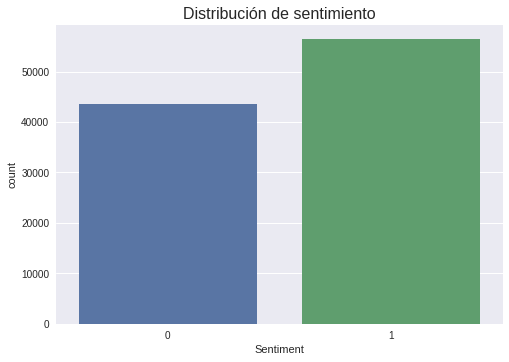

In [27]:
# Hacemos un recuento del Sentimiento. Negativo = 0 ; Positivo = 1
plt.title('Distribución de sentimiento', fontsize=16)
sns.countplot(data['Sentiment'],label='Contador')
plt.show()

Se observa que tenemos más muestras positivas que negativas.

Como se trata de un dataset destinado para realizar un análisis de sentimiento, en la limpieza del dataset vamos a seguir los siguientes pasos:
>* Eliminación de Stop Words 
* Sustitución de abreviaciones y correcciones ortográficas
* Stemming
* Lematización
* Sustitución de Emojis
* Borrado de: RT, hashtag, URLs, menciones
* Sustitución de letras largas que se repiten

In [0]:
# Cambiamos el nombre de las columnas
#newdf = df[df.columns[2:4]]
data = data[data.columns[1:3]]
data.columns = ['Sentiment', 'Text']

## 1.2 Pre-processing

In [0]:
def handle_emojis(tweet):
  
  # Smile -- :), : ), :-), (:, ( :, (-:, :')
  tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', 'smile', tweet)
  # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
  tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', 'laugh', tweet)
  # Love -- <3, :*
  tweet = re.sub(r'(<3|:\*)', 'love', tweet)
  # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
  tweet = re.sub(r'(;-?\)|;-?D|\(-?;)', 'wink', tweet)
  # Sad -- :-(, : (, :(, ):, )-:
  tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', 'sad', tweet)
  # Cry -- :,(, :'(, :"(
  tweet = re.sub(r'(:,\(|:\'\(|:"\()', 'cry', tweet)
  return tweet
  

In [0]:
# Handle emojis
data['Text'] = data['Text'].apply(lambda x: handle_emojis(x))

In [31]:
!ls

sample_data  train_sentiment_utf8.csv


In [0]:
# Cleaning Stop Words
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split()if word not in (stop)]))

# Convert to lower case
data['Text'] = data['Text'].apply(lambda x: x.lower())

# Replaces URLs
data['Text'] = data['Text'].apply(lambda x: re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', x))

# Replace @handle
data['Text'] = data['Text'].apply(lambda x: re.sub(r'@[\S]+', '', x))

# Replaces hashtags
data['Text'] = data['Text'].apply(lambda x: re.sub(r'#(\S+)', r' \1 ', x))

# Delete RT(retweet)
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\brt\b', '', x))

# Replace 2 more dot with spaces
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\.{2,}',' ',x))

# Strip space, " and ' from tweet
data['Text'] = data['Text'].apply(lambda x: x.strip(' "\''))

# Replace multiple spaces with a single space
data['Text'] = data['Text'].apply(lambda x: re.sub(r'\s+',' ', x))



In [33]:
!wget https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt

--2019-03-25 14:59:13--  https://raw.githubusercontent.com/Deffro/text-preprocessing-techniques/master/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5135 (5.0K) [text/plain]
Saving to: ‘slang.txt’

slang.txt           100%[===================>]   5.01K  --.-KB/s    in 0s      

2019-03-25 14:59:13 (61.4 MB/s) - ‘slang.txt’ saved [5135/5135]



In [0]:
# Read the slang's dictionary
slang = pd.read_csv("slang.txt", header=None, encoding='latin-1', delimiter='\t')
slang.columns = ['Abbreviation', 'Text_Abbr']
slang_dictionary = dict([(Abbreviation, Text_Abbr) for Abbreviation, Text_Abbr in zip(slang.Abbreviation, slang.Text_Abbr)])

In [0]:
def replaceSlangWords(text):
  for word in text.split():
    if word.lower() in slang_dictionary:
      text = text.replace(word, slang_dictionary[word.lower()])
  return (text)

In [0]:
# Replace Abbeviatures and Slang
data['Text'] = data['Text'].apply(lambda x: replaceSlangWords(x))

In [0]:
# Dictionary of english contractions

contractions = {
    "ain't": "is not", "aren't": "are not","can't": "cannot", 
    "can't've": "cannot have", "'cause": "because",
    "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
    "didn't": "did not", 
    "doesn't": "does not", "don't": "do not",
    "hadn't": "had not", "hadn't've": "had not have",
    "hasn't": "has not", "haven't": "have not", 
    "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
    "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
    "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
    "I'll've": "I will have","I'm": "I am", "I've": "I have", 
    "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
    "i'll've": "i will have","i'm": "i am", "i've": "i have", 
    "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
    "it'll": "it will", "it'll've": "it will have","it's": "it is", 
    "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
    "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
    "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
    "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
    "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
    "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
    "she's": "she is", "should've": "should have", "shouldn't": "should not", 
    "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
    "this's": "this is",
    "that'd": "that would", "that'd've": "that would have","that's": "that is", 
    "there'd": "there would", "there'd've": "there would have","there's": "there is", 
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
    "they'll've": "they will have", "they're": "they are", "they've": "they have", 
    "to've": "to have", "wasn't": "was not", "we'd": "we would", 
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
    "we're": "we are", "we've": "we have", "weren't": "were not", 
    "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
    "what's": "what is", "what've": "what have", "when's": "when is", 
    "when've": "when have", "where'd": "where did", "where's": "where is", 
    "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
    "who's": "who is", "who've": "who have", "why's": "why is", 
    "why've": "why have", "will've": "will have", "won't": "will not", 
    "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
    "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
    "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

In [0]:
# Function to replace english contractions
def replaceContractionWords(text):
  for word in text.split():
    if word.lower() in contractions:
      text = text.replace(word, contractions[word.lower()])
  return text

In [0]:
# Replace english contractions
data['Text'] = data['Text'].apply(lambda x: replaceContractionWords(x))

In [40]:
def preprocessing_word(text):
  for word in text.split():
    # Convert more than 2 letter repetitions to 2 letter
    text = text.replace(word, re.sub(r'(.)\1+', r'\1\1', word))
    
  for word in text.split():
    # Removing special characters
    text = text.replace(word, re.sub('[^a-zA-z0-9\s]', ' ', word))

  for word in text.split():
    # Removing punctuation marks
    text = text.replace(word, word.strip('\'"?!,.():;'))
    
  return text
  
    

<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \s
<input>:8: Dep

In [0]:
# Aplicamos el pre-proceso de las palabras
data['Text'] = data['Text'].apply(lambda x: preprocessing_word(x))

In [42]:
#Chequeamos el funcionamiento del pre-procesado

data['Text'][:20].apply(lambda x: str(TextBlob(x).correct()))

0                                        sad all friend
1                             i missed new moon trailer
2                             oh my god already 7 30  o
3     omaha  in so in unna cry  i have dentist since...
4                  think mi boyfriend cheating me   tut
5                                           worry much 
6                                          just chill  
7              sunny again work tomorrow     to tonight
8                   handed uniform today   miss already
9                                     him wonder number
10                                i must think positive
11                      thanks waters face day  112 102
12                                   weekend sucked far
13                        j isn showing australia more 
14                                         ok that win 
15                        it    this way feel right now
16    aware man i am completely useless now  funny  ...
17    feeling strangely fine  now i am donna go 

In [0]:
# Stemming 
ps = PorterStemmer()
data['Text'] = data['Text'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))


In [0]:
# Lemmatization
lmtzr = WordNetLemmatizer()
data['Text'] = data['Text'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))

In [0]:
# Remove no repeated words and empty tweets
words_no_repe = pd.Series(' '.join(data['Text']).split()).value_counts().where(lambda x: x==1).dropna().index
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in words_no_repe))
data = data.loc[data['Text'] != '']


In [46]:
print(data.head(20))
print("Tabla de dimensiones: {} ".format(data.shape))

    Sentiment                                               Text
0           0                                     sad apl friend
1           0                            i miss new moon trailer
2           1                           oh my god alreadi 7 30 o
3           0  im soo im gunna cri i have dentist sinc 11 i s...
4           0                    think mi boyfriend cheat me t_t
5           0                                         worri much
6           1                                            chillin
7           0               sunni again work tomorrow tv tonight
8           1                    hand uniform today miss alreadi
9           1                                  hmm wonder number
10          0                                 i must think posit
11          1                       thank hater face day 112 102
12          0                                   weekend suck far
13          0                        jb isnt show australia more
14          0            

## 1.3  Aplicación de modelo

### 1.3.1 Modelos Machine Learning

Puesto que se trata de un problema de clasificación, vamos a emplear los siguientes modelos



1.   **Naive Bayes**: modelo simple y efectivo
2.   **SVM**: Uno de los mejores clasificadores de texto



In [47]:
X = data['Text']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)


X_train shape:  (79436,)
X_test shape:  (19859,)
y_train shape:  (79436,)
y_test shape:  (19859,)


#### Naive Bayes

In [0]:
#Definimos el pipeline para definir que pasos en serie queremos ejecutar
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('clf', MultinomialNB()),
])

# Jugamos con distintos parámetros con los que barremos el gridsearch para buscar el conjunto que mejores prestaciones da
parameters = {
    'vect__min_df': (2, 3),
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3), (2, 3), (1,4)),
    'clf__alpha': (1e-1, 1e-2, 1e-3),
}

In [0]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

In [51]:
# Obtenemos las predicciones de train
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))
  
print("Best score: %0.4f" % grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 16.0min finished


	clf__alpha: 0.1
	vect__max_df: 0.5
	vect__min_df: 3
	vect__ngram_range: (1, 2)
Best score: 0.7346


In [52]:
# Obtenemos las predicciones de test
pipeline.set_params(**best_parameters)
predictions = pipeline.score(X_test, y_test)
print('Test Score: %.4f ' % predictions)

Test Score: 0.7384 


Obtenemos un accuracy en test de 0.7384 en el train y 0.7346 en test, por lo que no hay overfitting.

Nos guardamos las predicciones para usarlo luego en la matriz de confusión

In [0]:
y_pred_train_Bayes = pipeline.predict(X_train)
y_pred_test_Bayes = pipeline.predict(X_test)

#### SVM (Support Vector Machines)

In [0]:
#Definimos el pipeline para definir que pasos en serie queremos ejecutar
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    ('clf', LinearSVC()),
])

In [0]:
# Jugamos con distintos parámetros con los que barremos el gridsearch para buscar el conjunto que mejores prestaciones da
parameters = {
    'vect__min_df': (2, 3),
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2), (1, 3), (2, 3), (1,4)),
    'clf__C': (0.1, 0.5, 1),
}

In [0]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

In [103]:
grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))
  
print("Best score: %0.4f" % grid_search.best_score_)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 17.7min finished


	clf__C: 0.1
	vect__max_df: 0.5
	vect__min_df: 2
	vect__ngram_range: (1, 2)
Best score: 0.7568


In [104]:
pipeline.set_params(**best_parameters)
predictions = pipeline.score(X_test, y_test)
print('Test Score:%0.4f' % predictions)

Test Score:0.7604


Al igual que los resultados que hemos obtenido con Naive Bayes, el accuracy que obtenemos en el test 0.7604 es muy parecido al accuracy que obtenemos en training que es de 0.7568. Puede haber overfitting, ya que los resultados que obtenemos en test son mayores que los obtenidos en entrenamiento

In [0]:
y_pred_train_svm = pipeline.predict(X_train)
y_pred_test_svm = pipeline.predict(X_test)

### 1.3.2 Modelo de Deep Learning

Se va a emplear un modelo con arquitectura BILSTM con vectores de palabra pre-entrenados de  Glove para la capa de embeddings (Ver [paper](http://aclweb.org/anthology/P/P16/P16-2034.pdf))

#### BILSTM + Glove

In [0]:
max_features = len(Counter(" ".join(data['Text'].values.tolist()).split(" ")).items())
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['Text'].values)

X = tokenizer.texts_to_sequences(data['Text'].values)
X = pad_sequences(X)

y = pd.get_dummies(data['Sentiment']).values

In [55]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(X, y, test_size=0.2, random_state=100)
print('X_train_dl',X_train_dl.shape)
print('X_test_dl',X_test_dl.shape)
print('y_train_dl',y_train_dl.shape)
print('y_test_dl',y_test_dl.shape)

X_train_dl (79436, 91)
X_test_dl (19859, 91)
y_train_dl (79436, 2)
y_test_dl (19859, 2)


In [56]:
!wget http://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip

--2019-03-25 15:36:03--  http://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip [following]
--2019-03-25 15:36:04--  https://nlp.stanford.edu/data/wordvecs/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408741 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  6.23MB/s    in 10m 27s 

2019-03-25 15:46:32 (2.31 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408741/1520408741]



In [57]:
!unzip glove.twitter.27B.zip

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.100d.txt  
  inflating: glove.twitter.27B.200d.txt  
  inflating: glove.twitter.27B.25d.txt  
  inflating: glove.twitter.27B.50d.txt  


In [0]:
# load embedding as a dict
def load_embedding(filename):
	# load embedding into memory, skip first line
	file = open(filename,'r')
	lines = file.readlines()
	file.close()
	# create a map of words to vectors
	embedding = dict()
	for line in lines:
		parts = line.split()
		# key is string word, value is numpy array for vector
		embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
	return embedding

# create a weight matrix for the Embedding layer from a loaded embedding
def get_weight_matrix(embedding, vocab):
	# total vocabulary size plus 0 for unknown words
	vocab_size = len(vocab) + 1
	# define weight matrix dimensions with all 0
	weight_matrix = np.zeros((vocab_size, 100))
	# step vocab, store vectors using the Tokenizer's integer mapping
	for word, i in vocab.items():
		vector = embedding.get(word)
		if vector is not None:
			weight_matrix[i] = vector
	return weight_matrix

# load embedding from file
raw_embedding = load_embedding('glove.twitter.27B.100d.txt')
# get vectors in the right order
embedding_vectors = get_weight_matrix(raw_embedding, tokenizer.word_index)

In [59]:
lm_inputs = Input(shape=(X_train_dl.shape[1], ), name='lm_input')

embeddings = Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_vectors], trainable=False)(lm_inputs)

spaDrop = SpatialDropout1D(0.3)(embeddings)


lstm = CuDNNLSTM(256, return_sequences=True, name='rnn1')

lmlstm = Bidirectional(lstm)(spaDrop)


avg_pool = GlobalAveragePooling1D()(lmlstm)

max_pool = GlobalMaxPooling1D()(lmlstm)

conc = concatenate([avg_pool, max_pool])


lmout = Dense(2, activation='softmax')(conc)

model1 = Model(lm_inputs, lmout)
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


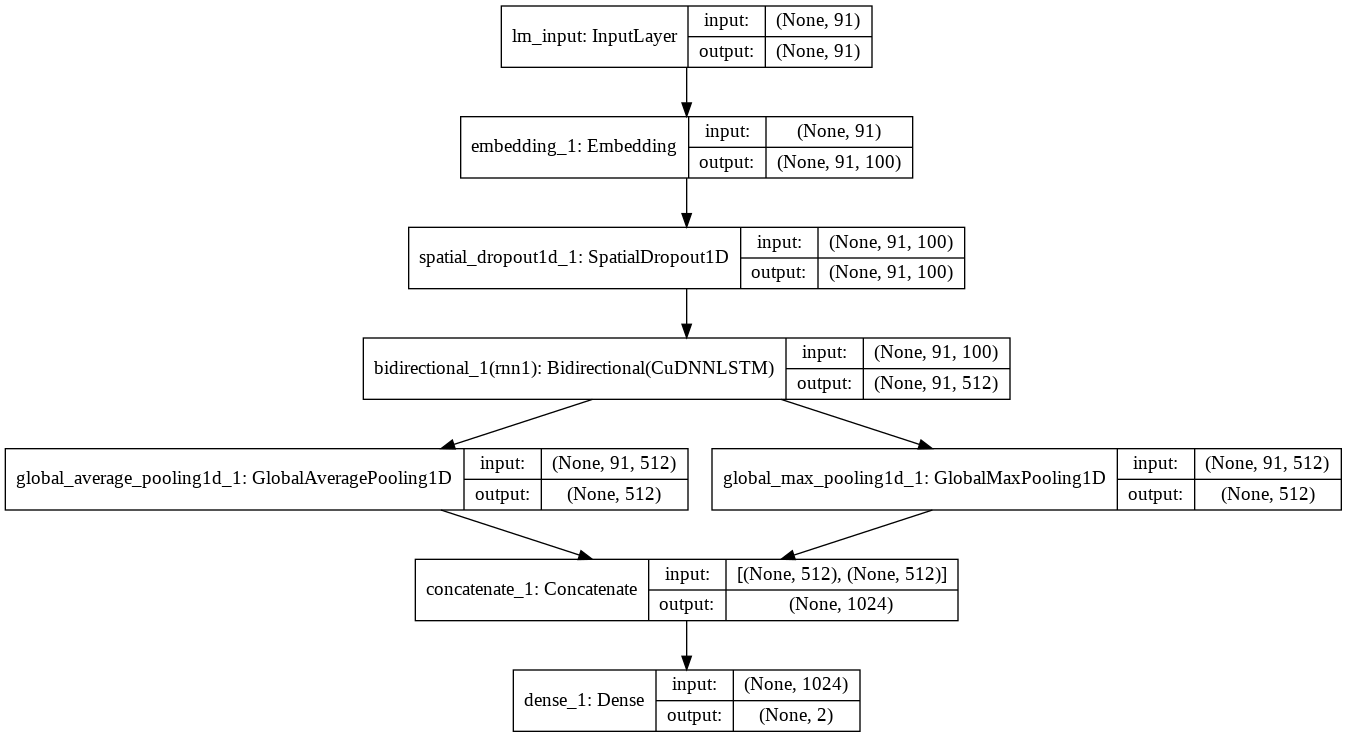

In [60]:
plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)
Image('model1.png', width=1024)

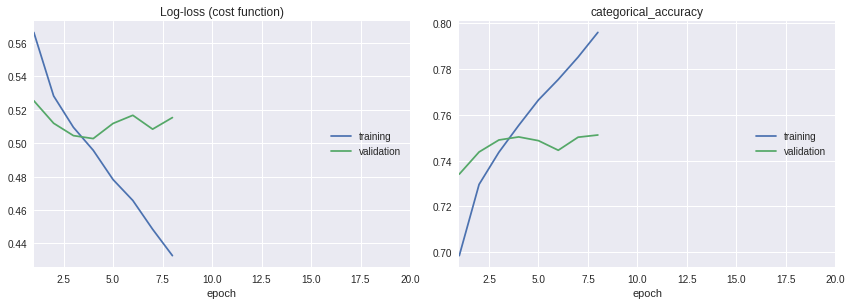

Log-loss (cost function):
training   (min:    0.433, max:    0.566, cur:    0.433)
validation (min:    0.503, max:    0.525, cur:    0.515)

categorical_accuracy:
training   (min:    0.698, max:    0.796, cur:    0.796)
validation (min:    0.734, max:    0.751, cur:    0.751)


In [61]:
checkpoint1 = ModelCheckpoint('weights-1.{epoch:02d}-{loss:.2f}.hdf5', 
                              monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model1.fit(X_train_dl, y_train_dl, validation_split=0.3, epochs=20, batch_size=64, verbose=1, 
           callbacks=[checkpoint1, PlotLossesKeras(),
                      ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose=0),
                      EarlyStopping(monitor='val_loss', patience=4, mode='auto', verbose=0)])

In [62]:
scores = model1.evaluate(X_test_dl, y_test_dl, verbose=0) 
print("Accuracy: %.4f%%" % (scores[1]*100))

Accuracy: 74.9534%


In [63]:
print(X_test_dl.shape)
print(y_test_dl.shape)

(19859, 91)
(19859, 2)


In [64]:
X_train_dl[2]


array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     1,    10, 16688,    48,     1,    19,
         306], dtype=int32)

El accuracy que obtenemos en el modelo de Deep Learning que aplicamos es levemente más bajo que  los resultados aplicando modelos clásicos como Bayes o SVM. Hay que tener en cuenta que el número de épocas que hemos puesto como parámetro es bajo, por lo que hay todavía margen de mejorar el accuracy de Deep Learning + Glove.

Por otra parte, no se observa que haya overfitting.

In [0]:
y_pred_train_DL_g = model1.predict(X_train_dl)
y_pred_train_DL_g = (y_pred_train_DL_g > 0.5)

y_pred_test_DL_g = model1.predict(X_test_dl)
y_pred_test_DL_g = (y_pred_test_DL_g > 0.5)

In [0]:
#!rm -rf glove.twitter.27B.zip.1

## 1.4 Matriz de confusión

In [0]:
#Definimos la función que calcula las métricas que vamos a utilizar para medir la bondad de los algoritmos
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()
    
    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))
    
    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1,6], [1,1], color=(0.6,0.6,0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

In [0]:
#definimos la función que pintará la matriz de confusión
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

#### MATRIZ DE CONFUSIÓN NAIVE BAYES

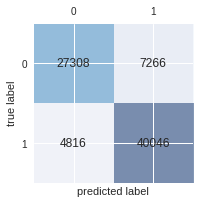

ACC:  0.8479027141346492
SEN:  0.8926485667157059
ESP:  0.7898420778619772
PPV:  0.846423740277308
FSC:  0.8689218217718663


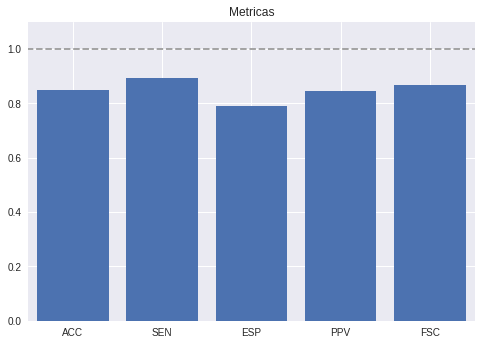

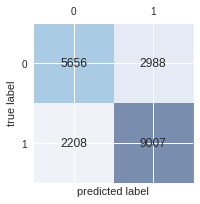

ACC:  0.7383554056095473
SEN:  0.8031208203299153
ESP:  0.6543267006015734
PPV:  0.7508962067528137
FSC:  0.7761309780267126


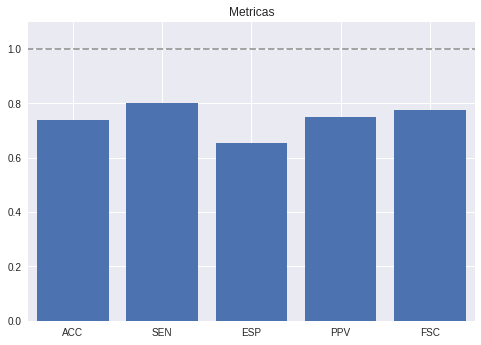

In [99]:
#Sacamos las métricas obtenidas con Bayes:

confusionMatrix_NB = confusion_matrix(y_train,y_pred_train_Bayes)
plot_confusion_matrix(confusionMatrix_NB)
calcula_metricas(confusionMatrix_NB)

confusionMatrix_NB_test_NB  = confusion_matrix(y_test, y_pred_test_Bayes)
plot_confusion_matrix(confusionMatrix_NB_test_NB)
calcula_metricas(confusionMatrix_NB_test_NB)


#### MATRIZ DE CONFUSIÓN SVM

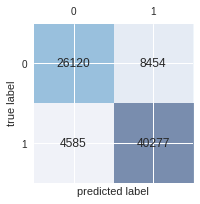

ACC:  0.8358552797220404
SEN:  0.8977976906959119
ESP:  0.755480997281194
PPV:  0.8265170014980198
FSC:  0.8606840255147287


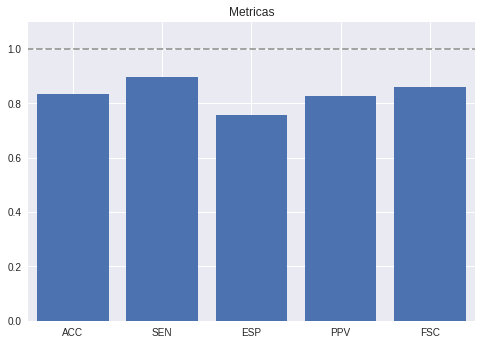

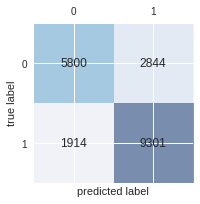

ACC:  0.7604108968225993
SEN:  0.8293357111012037
ESP:  0.6709856547894494
PPV:  0.7658295594895018
FSC:  0.7963184931506849


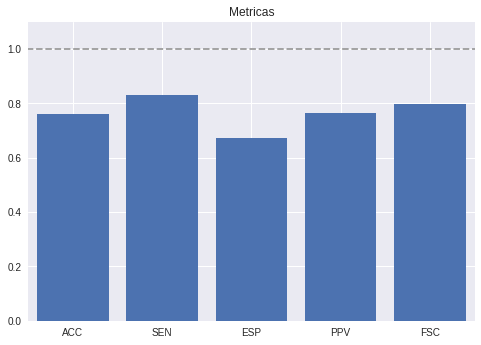

In [106]:
# Matriz de confusión para SVM
confusionMatrix_SVM = confusion_matrix(y_train,y_pred_train_svm)
plot_confusion_matrix(confusionMatrix_SVM)
calcula_metricas(confusionMatrix_SVM)

confusionMatrix_SVM_test_SVM  = confusion_matrix(y_test, y_pred_test_svm)
plot_confusion_matrix(confusionMatrix_SVM_test_SVM)
calcula_metricas(confusionMatrix_SVM_test_SVM)

#### MATRIZ DE CONFUSIÓN DEEP LEARNING GLOVE

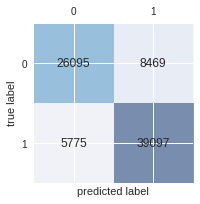

ACC:  0.820685835137721
SEN:  0.8713005883401675
ESP:  0.7549762758939937
PPV:  0.8219526552579574
FSC:  0.8459075272074255


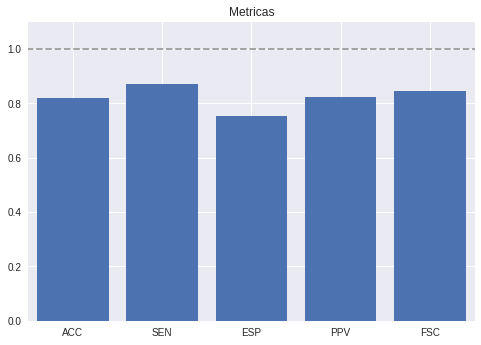

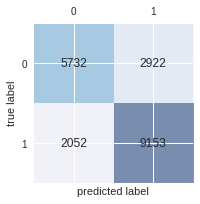

ACC:  0.7495342162243819
SEN:  0.8168674698795181
ESP:  0.6623526692858793
PPV:  0.7580124223602485
FSC:  0.786340206185567


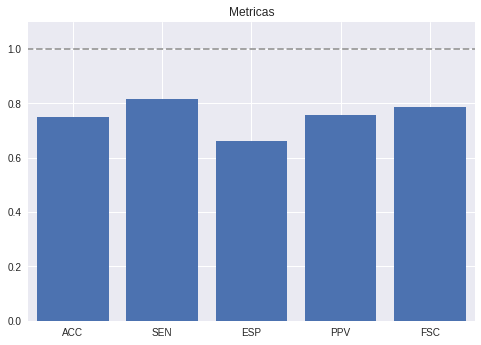

In [69]:
#Sacamos las métricas obtenidas con DL:

confusionMatrix_DL_Train = confusion_matrix(y_train_dl.argmax(axis=1), y_pred_train_DL_g.argmax(axis=1))

confusionMatrix_DL_Test = confusion_matrix(y_test_dl.argmax(axis=1), y_pred_test_DL_g.argmax(axis=1))

plot_confusion_matrix(confusionMatrix_DL_Train)
calcula_metricas(confusionMatrix_DL_Train)

plot_confusion_matrix(confusionMatrix_DL_Test)
calcula_metricas(confusionMatrix_DL_Test)

Observación:

* Se observa que en los 3 modelos obtenemos valores de accuracy muy similares. A pesar de dichos resultados, nos decantamos por una arquitectura de Deep Learning porque existe un compromiso entre la especificidad y sensibilidad.

* El problema que tenemos es que población está desbalanceada y al aplicar los modelos de Machine Learning siempre elija la clase mayoritaria

# <a name=ejercicio2>Ejercicio 2. Análisis con políticos</a># 

## 2.1. Análisis Exploratorio de los datos

In [0]:
!ls

In [0]:
#!rm -rf slang.txt.2

In [26]:
# Upload el dataset train_sentiment_utf8.csv

from google.colab import files
files.upload()


Saving dataset2.json to dataset2.json


{'dataset2.json': b'{"0": {"tweet": "\\u201cLow plastic stool, cheap but delicious noodles, cold Hanoi beer.\\u201d This is how I\\u2019ll remember Tony. He taught us about food \\u2014 but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We\\u2019ll miss him. https://t.co/orEXIaEMZM", "label": "OBAMA"}, "1": {"tweet": "\\u201cLow plastic stool, cheap but delicious noodles, cold Hanoi beer.\\u201d This is how I\\u2019ll remember Tony. He taught us about food \\u2014 but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We\\u2019ll miss him. https://t.co/orEXIaEMZM", "label": "OBAMA"}, "2": {"tweet": "This National Gun Violence Awareness Day, show your commitment to keeping our kids safe from gun violence. Then, for everyone we\\u2019ve lost, take action to change our leadership and our laws until they reflect that commitment - no matter how long it takes. https://t.co/lraIwl

In [27]:
# Miramos como son los primeros datos
politicos = pd.read_json('dataset2.json',orient='index')
politicos.head(10)


,label,tweet
0,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
1,OBAMA,"“Low plastic stool, cheap but delicious noodle..."
10,OBAMA,Michelle and I are so inspired by all the youn...
100,OBAMA,Senate leaders' obstruction of our Supreme Cou...
1000,OBAMA,"In 31 states, people can still be fired becaus..."
1001,OBAMA,"Seven down, one more to go. Make sure you tune..."
1002,OBAMA,Have you entered yet? You and a friend could w...
1003,OBAMA,Check out five big victories that made 2015 a ...
1004,OBAMA,Suit up—it's President Obama's final State of ...
1005,OBAMA,You can still join the team fighting for progr...


In [28]:
# Miramos las dimensiones de la tabla
politicos.shape

(5889, 2)

In [29]:
# Miramos que valores puede tomar la columna 'label'
politicos['label'].unique()

array(['OBAMA', 'TRUMP'], dtype=object)

In [30]:
# Miramos de que tipo son los datos
politicos.dtypes

label    object
tweet    object
dtype: object

In [31]:
# Leemos los 50 últimos tweets para ver que palabras tenemos que preprocesar
politicos.tail(50)

,label,tweet
954,OBAMA,The last seven years have been packed with pro...
955,OBAMA,One last time. #SOTU https://t.co/Fu9YeOQG9D
956,OBAMA,Tonight—it's going to be a good time. Don't mi...
957,OBAMA,"Get ready for President Obama's final #SOTU, a..."
958,OBAMA,President Obama's last State of the Union addr...
959,OBAMA,January 12—don't miss it. https://t.co/LLcwp8p...
96,OBAMA,Usted y su familia merecen la tranquilidad de ...
960,OBAMA,Another milestone to celebrate for wind power—...
961,OBAMA,Tuesday: https://t.co/DYvFziQN3t #SOTU https:/...
962,OBAMA,"""Today, the American auto industry is back."" —..."


In [32]:
# Sacamos la información básica de las columnas
politicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5889 entries, 0 to 999
Data columns (total 2 columns):
label    5889 non-null object
tweet    5889 non-null object
dtypes: object(2)
memory usage: 138.0+ KB


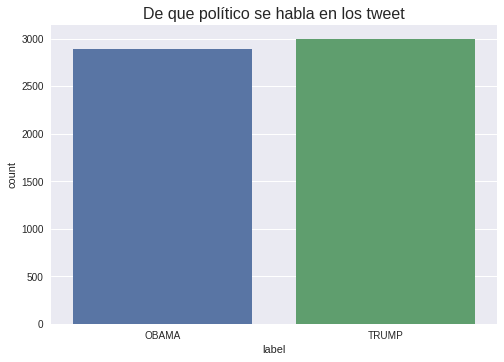

In [33]:
# Hacemos un recuento de las label. 
plt.title('De que político se habla en los tweet', fontsize=16)
sns.countplot(politicos['label'],label='Contador')
plt.show()

## 2.2 Pre-processing

In [0]:
# Handle emojis
politicos['tweet_limpio'] = politicos['tweet'].apply(lambda x: handle_emojis(x))

In [0]:
# Convert to lower case
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: x.lower())

# Cleaning Stop Words
stop = stopwords.words('english')
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: ' '.join([word for word in x.split()if word not in (stop)]))

# Replaces URLs
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', x))

# Replace @handle
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: re.sub(r'@[\S]+', '', x))

# Replaces hashtags
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: re.sub(r'#(\S+)', r' \1 ', x))

# Delete RT(retweet)
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: re.sub(r'\brt\b', '', x))

# Replace 2 more dot with spaces
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: re.sub(r'\.{2,}',' ',x))

# Strip space, " and ' from tweet
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: x.strip(' "\''))

# Replace multiple spaces with a single space
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: re.sub(r'\s+',' ', x))

In [0]:
# Replace Abbeviatures and Slang
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: replaceSlangWords(x))

In [0]:
# Replace english contractions
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: replaceContractionWords(x))

In [0]:
# Aplicamos el pre-proceso de las palabras
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: preprocessing_word(x))

In [39]:
#Chequeamos el funcionamiento del pre-procesado
politicos['tweet_limpio'][:20].apply(lambda x: str(TextBlob(x).correct()))

0        low plastic stool  cheap delicious nodules  c...
1        low plastic stool  cheap delicious nodules  c...
10      mitchell inspired young people made today s ma...
100     senate leaders  obstruction supreme court nomi...
1000    31 states  people still fired love  help chang...
1001    seven down  one go  make sure tune president d...
1002           entered yet  friend could win trip alaska 
1003    check five big victories made 2015 great year ...
1004    suit up it s president drama s final state uni...
1005    still join team fighting progress  get contrib...
1006    seeking adventure  find alaska  enter contest ...
1007    miss chance adventure lifetime  enter now and ...
1008     year full progress  there is work 2016 and help 
1009        merry christmas  everybody    president drama
101     senate leaders put common good politics the in...
1010     merry christmas  happy holidays yours big small 
1011    beautiful mountain tops  huge glanders  polar ...
1012          

In [0]:
# Stemming 
ps = PorterStemmer()
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split() ]))

In [0]:
# Lemmatization
lmtzr = WordNetLemmatizer()
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: ' '.join([lmtzr.lemmatize(word,'v') for word in x.split() ]))

In [0]:
# Remove no repeated words and empty tweets
words_no_repe = pd.Series(' '.join(politicos['tweet_limpio']).split()).value_counts().where(lambda x: x==1).dropna().index
politicos['tweet_limpio'] = politicos['tweet_limpio'].apply(lambda x: " ".join(x for x in x.split() if x not in words_no_repe))
politicos = politicos.loc[politicos['tweet_limpio'] != '']

In [43]:
print(politicos.head(20))
print("Tabla de dimensiones: {} ".format(politicos.shape))

      label                                              tweet  \
0     OBAMA  “Low plastic stool, cheap but delicious noodle...   
1     OBAMA  “Low plastic stool, cheap but delicious noodle...   
10    OBAMA  Michelle and I are so inspired by all the youn...   
100   OBAMA  Senate leaders' obstruction of our Supreme Cou...   
1000  OBAMA  In 31 states, people can still be fired becaus...   
1001  OBAMA  Seven down, one more to go. Make sure you tune...   
1002  OBAMA  Have you entered yet? You and a friend could w...   
1003  OBAMA  Check out five big victories that made 2015 a ...   
1004  OBAMA  Suit up—it's President Obama's final State of ...   
1005  OBAMA  You can still join the team fighting for progr...   
1006  OBAMA  Seeking adventure? Find it in Alaska. Enter @O...   
1007  OBAMA  Don't miss your chance for the adventure of a ...   
1008  OBAMA  This year was full of progress. But there's mo...   
1009  OBAMA  "Merry Christmas, everybody!" —President Obama...   
101   OBAM

## 2.3  Aplicación de modelo

Se va a realizar el análisis de los temas que se hablan mediante la aplicación de Topic Modeling en tweets, para ello se va a utilizar el algoritmo LDA(Latent Dirichlet Allocation)

### Topic Modeling

In [0]:
# Metemos en un array los tweet de los respectivos presidentes
obama = politicos[politicos['label']=="OBAMA"]['tweet_limpio'].values
trump = politicos[politicos['label']=="TRUMP"]['tweet_limpio'].values


In [45]:
# Subimos las imagenes de Trump y Obama que vamos a usar como máscara de la nube de palabras
# Upload el dataset train_sentiment_utf8.csv

from google.colab import files
files.upload()


Saving 03-bannon-trump-split.w700.h700.jpg to 03-bannon-trump-split.w700.h700.jpg
Saving obama_mask1.png to obama_mask1.png


{'03-bannon-trump-split.w700.h700.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xc0\x00\x0b\x08\x02\xbc\x02\xbc\x01\x01\x11\x00\xff\xc4\x00\x1e\x00\x01\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x08\t\x07\n\xff\xc4\x00G\x10\x00\x02\x01\x03\x02\x05\x02\x04\x04\x04\x03\x03\n\x06\x03\x00\x00\x01\x02\x03\x04\x11\x05!\x06\x07\x121A\x13Q\x08"aq\t\x142\x81#BR\x91\x15\xa1\xb1r\xc1\xf0\x16$&3Cb\x82\x92\xd1\xe1\x17\x18Sc\xa2\xf1%4D\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xf5L\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

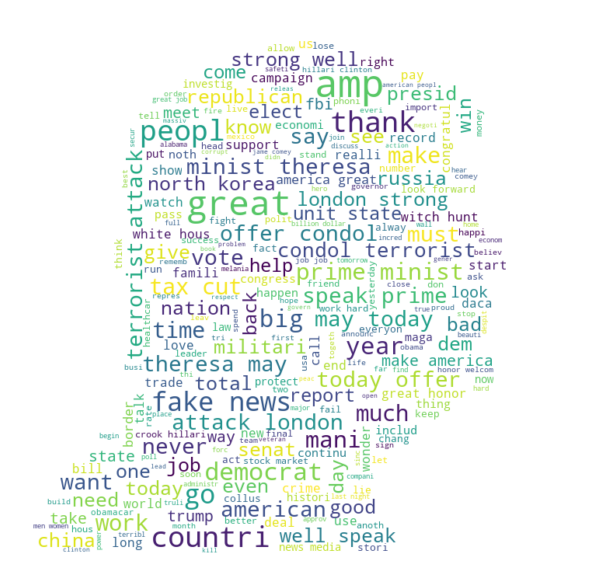

In [46]:
mask = np.array(Image2.open(path.join(getcwd(), "03-bannon-trump-split.w700.h700.jpg")))

wc = WordCloud(background_color="white", max_words=250, mask=mask,
               max_font_size=50, random_state=42)
wc.generate((' '.join(trump)))

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

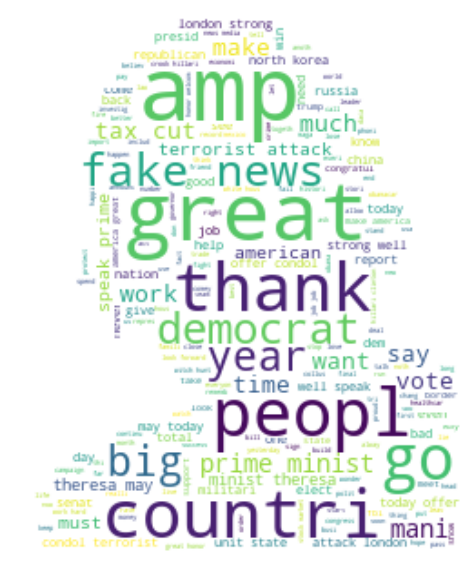

In [47]:
mask = np.array(Image2.open(path.join(getcwd(), 'obama_mask1.png')))

wc = WordCloud(background_color="white", max_words=250, mask=mask,
               max_font_size=50, random_state=42)
wc.generate((' '.join(trump)))

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
# Tokenizamos los tweets
politicos['tokenized_tweet'] = politicos['tweet_limpio'].apply(lambda x: nltk.word_tokenize(x) )

In [0]:
documents = politicos['tokenized_tweet']

In [50]:
#dictionary building manually as always
vocab = set([t for doc in documents for t in doc])
w2id = {k:i for  i,k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}
print('{} unique tokens'.format(len(w2id)))

3548 unique tokens


In [0]:
from gensim.corpora import Dictionary

In [52]:
#building Dictionary with gensim
gensim_dict = Dictionary(documents)
#gensim_dict.filter_extremes(no_below=2, no_above=0.3)
len(gensim_dict)

3548

In [0]:
#corpus is a group of documents
corpus = [gensim_dict.doc2bow(doc) for doc in documents]

In [0]:
lda_big = models.LdaModel(corpus, id2word=gensim_dict, num_topics=50, iterations=5, passes=20, alpha='auto')

In [0]:
#manual exploration with show topics
lda_big.show_topics() #..

[(39,
  '0.085*"up" + 0.046*"poll" + 0.045*"word" + 0.036*"way" + 0.032*"air" + 0.031*"highest" + 0.029*"differ" + 0.026*"merrick" + 0.026*"travel" + 0.025*"voic"'),
 (37,
  '0.120*"name" + 0.117*"add" + 0.093*"agre" + 0.059*"gun" + 0.051*"success" + 0.047*"violenc" + 0.039*"congress" + 0.028*"call" + 0.022*"reduc" + 0.020*"n"'),
 (0,
  '0.081*"congratul" + 0.063*"histori" + 0.051*"washington" + 0.043*"fire" + 0.029*"2016" + 0.028*"post" + 0.028*"world" + 0.026*"complet" + 0.024*"greatest" + 0.023*"leadership"'),
 (7,
  '0.163*"terrorist" + 0.161*"condol" + 0.050*"close" + 0.048*"beauti" + 0.047*"miss" + 0.026*"cost" + 0.021*"amazon" + 0.017*"no" + 0.017*"over" + 0.017*"o"'),
 (46,
  '0.087*"pay" + 0.086*"realli" + 0.078*"crime" + 0.052*"7" + 0.035*"weak" + 0.032*"away" + 0.025*"freedom" + 0.022*"five" + 0.021*"hurt" + 0.020*"vet"'),
 (1,
  '0.098*"senat" + 0.069*"leader" + 0.064*"doyourjob" + 0.064*"court" + 0.054*"suprem" + 0.051*"give" + 0.041*"stop" + 0.039*"bad" + 0.027*"obstruct"

In [0]:
lda_mid = models.LdaModel(corpus, id2word=gensim_dict, num_topics=20, iterations=5, passes=20, alpha='auto')
#print(lda_mid.perplexity(corpus))
vis = pyLDAvis.gensim.prepare(lda_mid, corpus, gensim_dict)

In [0]:
pyLDAvis.display(vis)

In [0]:
lda_small = models.LdaModel(corpus, id2word=gensim_dict, num_topics=3, iterations=5, passes=20, alpha='auto')
#print(lda_mid.perplexity(corpus))
vis = pyLDAvis.gensim.prepare(lda_small, corpus, gensim_dict)


In [0]:
pyLDAvis.display(vis)

In [0]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, iterations=5, passes=20, alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
try:
  limit=40; start=2; step=2;
  model_list, coherence_values = compute_coherence_values(dictionary=gensim_dict, corpus=corpus, texts=documents, start=start, limit=limit, step=step)
  x = range(start, limit, step)
except:
  print('se queda percha el colab')


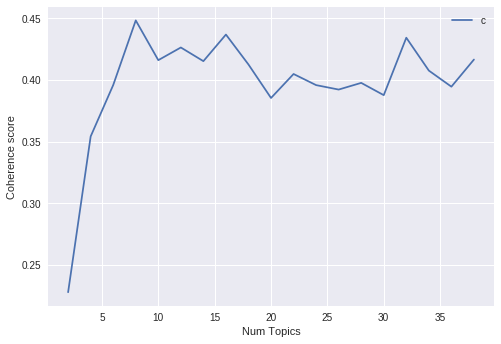

In [56]:
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
try:
  lda_coherence_value = models.LdaModel(corpus, id2word=gensim_dict, num_topics=8, iterations=5, passes=20, alpha='auto')
  vis = pyLDAvis.gensim.prepare(lda_coherence_value, corpus, gensim_dict)
except:
  print('Error')

In [58]:
pyLDAvis.display(vis)

In [59]:
lda_coherence_value.show_topics()

[(0,
  '0.032*"news" + 0.025*"fake" + 0.019*"trump" + 0.014*"amp" + 0.014*"elect" + 0.014*"media" + 0.014*"russia" + 0.012*"report" + 0.011*"ever" + 0.011*"stori"'),
 (1,
  '0.045*"great" + 0.033*"amp" + 0.028*"state" + 0.025*"thank" + 0.022*"today" + 0.020*"nation" + 0.018*"honor" + 0.017*"day" + 0.016*"meet" + 0.015*"s"'),
 (2,
  '0.154*"presid" + 0.126*"obama" + 0.027*"watch" + 0.026*"live" + 0.015*"m" + 0.015*"speak" + 0.015*"sotu" + 0.013*"address" + 0.012*"p" + 0.011*"tune"'),
 (3,
  '0.032*"senat" + 0.020*"need" + 0.020*"vote" + 0.017*"give" + 0.016*"doyourjob" + 0.016*"must" + 0.016*"leader" + 0.015*"republican" + 0.014*"congress" + 0.014*"democrat"'),
 (4,
  '0.036*"u" + 0.033*"well" + 0.032*"strong" + 0.031*"today" + 0.031*"speak" + 0.029*"minist" + 0.028*"may" + 0.028*"prime" + 0.027*"attack" + 0.025*"terrorist"'),
 (5,
  '0.026*"t" + 0.015*"know" + 0.015*"job" + 0.015*"win" + 0.014*"thing" + 0.013*"00" + 0.013*"happi" + 0.013*"love" + 0.012*"month" + 0.010*"good"'),
 (6,
  

De la gráfica de Coherence score vs Número de Topics observamos que el máximo de coherencia se alcanza para un número de topics de 8:
> 
* Topics 1 y 2,  están ligeramente solapados, hacen referencia al presidente  Obama, en el caso de del topic 2  tiene muchas palabras referentes al medio ambiente por ejemplo clima, el progreso de Ámerica con referencias a la economía. En el caso del topic 1 hace referencia al programa de salud Obamacare.

* Topics 4 y 7, se observa la repetición de algunas palabras, el topic 7  habla sobre la campaña de Hillary Clinton, con todo lo referente al de los mail y el FBI, mientras que el tópico 4 es una consecuencia de todo lo que ocurre en el topic 7 que lleva al desgaste de Hillary Clinton, llevando como consecuencia la victoria de Donald Trump con su frase Make America Great Again". La distancia entre los topics 4 y 7 es muy pequeña 

* topic 3: hace referencia a la economía y a las cifras de empleo durante el mandato de Obama

* El topic 5, está relacionado con la trama Rusa que facilito ganar a Trump las elecciones

* El topic 6, hace referencia al presidente Obama, hay varias palabras que hacen referencia a la violencia, inmigración y educación. Este topic tiene un connotación en cuanto a la presidencia de Obama


* El topico 8: Esta relacionado con Asia y todo lo referente a Corea del Norte, China. También, hay palabras de su relación con Melania y la Casa Blanca. Se observa palabras que hablan sobre Teresa May y Londres

# <a name=ejercicio3>Ejercicio 3. Generación de Tweets</a># 

## Librerías

In [18]:
# Actualizamos la librería de tensorflow-gpu
pip install --upgrade tensorflow-gpu==1.13.1

Requirement already up-to-date: tensorflow-gpu==1.13.1 in /usr/local/lib/python3.6/dist-packages (1.13.1)


In [0]:
from keras.models import Model
from keras.layers import Input, CuDNNLSTM, Dense, Dropout, Embedding, Bidirectional, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LambdaCallback
from keras.utils.vis_utils import plot_model
from collections import Counter

import pprint as pp
from copy import copy

In [20]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

## 3.1 Carga de los tweets como Obama

* Vamos a generar tweets como el presidente Obama:

In [21]:
!ls

sample_data


In [22]:
# Upload el dataset BarackObama.json

from google.colab import files
files.upload()

Saving BarackObama.json to BarackObama.json


{'BarackObama.json': b'{"0": "\\u201cLow plastic stool, cheap but delicious noodles, cold Hanoi beer.\\u201d This is how I\\u2019ll remember Tony. He taught us about food \\u2014 but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We\\u2019ll miss him. https://t.co/orEXIaEMZM", "1": "\\u201cLow plastic stool, cheap but delicious noodles, cold Hanoi beer.\\u201d This is how I\\u2019ll remember Tony. He taught us about food \\u2014 but more importantly, about its ability to bring us together. To make us a little less afraid of the unknown. We\\u2019ll miss him. https://t.co/orEXIaEMZM", "2": "This National Gun Violence Awareness Day, show your commitment to keeping our kids safe from gun violence. Then, for everyone we\\u2019ve lost, take action to change our leadership and our laws until they reflect that commitment - no matter how long it takes. https://t.co/lraIwlQAgl", "3": "We can never truly repay the debt we owe our fallen 

In [0]:
# Cargamos los tweets de Barack Obama
tweets = pd.read_json('BarackObama.json', typ='series')

df = tweets.to_frame('tweet')

In [24]:
# Miramos los 20 primeros tweets
df.head(20)

,tweet
0,"“Low plastic stool, cheap but delicious noodle..."
1,"“Low plastic stool, cheap but delicious noodle..."
10,Michelle and I are so inspired by all the youn...
100,Senate leaders' obstruction of our Supreme Cou...
1000,"In 31 states, people can still be fired becaus..."
1001,"Seven down, one more to go. Make sure you tune..."
1002,Have you entered yet? You and a friend could w...
1003,Check out five big victories that made 2015 a ...
1004,Suit up—it's President Obama's final State of ...
1005,You can still join the team fighting for progr...


In [25]:
print("Número total de tweets: %d" % len(df))

Número total de tweets: 2894


## 3.2 Preprocesamiento de los tweets

Observamos que los 2 primeros tweets están duplicados. Vamos a verificar si hay más tweets que esten duplicados:

In [0]:
df_dup = pd.DataFrame(data=df.duplicated(), columns=['repetidos'])

In [27]:
df_dup.head(10)

,repetidos
0,False
1,True
10,False
100,False
1000,False
1001,False
1002,False
1003,False
1004,False
1005,False


In [28]:
df_dup.tail(10)

,repetidos
990,False
991,False
992,False
993,False
994,False
995,False
996,False
997,False
998,False
999,False


In [0]:
df_dup = df_dup.loc[df_dup['repetidos'] == True]

In [30]:
print("Hay %d " % len(df_dup) + 'tweets repetidos')

Hay 33 tweets repetidos


Tenemos 33 tweets que están repetidos. Vamos a proceder a dejar sólo una copia:

In [0]:
# Eliminamos los duplicados
df = df.drop_duplicates()

In [32]:
print("Total de %d" % len(df) + ' tweets')

Total de 2861 tweets


In [0]:
#transformamos todo a minusculas
df = df['tweet'].str.lower()

In [34]:
df.head(10)

0       “low plastic stool, cheap but delicious noodle...
10      michelle and i are so inspired by all the youn...
100     senate leaders' obstruction of our supreme cou...
1000    in 31 states, people can still be fired becaus...
1001    seven down, one more to go. make sure you tune...
1002    have you entered yet? you and a friend could w...
1003    check out five big victories that made 2015 a ...
1004    suit up—it's president obama's final state of ...
1005    you can still join the team fighting for progr...
1006    seeking adventure? find it in alaska. enter @o...
Name: tweet, dtype: object

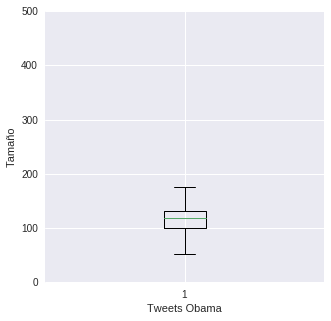

In [35]:
#miro el tamaño de los tweets, los pongo en cada uno, para luego saber el tamaño aproximado general,
# si los 140 originales o los 280 posteriores más lo que no suele contar como URLs, imágenes, hashtags.
#la media están en esos 140, pero los hay hasta de 300, por lo que hay mucha URL, usuarios, hashtags etc que podemos limpiar

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_ylim(-1, 500)
ax.set(xlabel='Tweets Obama', ylabel='Tamaño')

plt.boxplot([len(t) for t in df])
plt.show()

In [36]:
#donde meteré los tweets limpios para luego sacarles los caracteres
tweetLimpios = []


for row in df:
    tweet = str(row)
    #quitamos puntuaciones
    tweet = re.sub('[^A-Za-z0-9\s]/i','',tweet)
    #quitamos saltos de linea
    tweet = re.sub(r'\n', '', tweet)
    #quitamos menciones de usuarios
    tweet = re.sub(r'@[A-Za-z0-9]+','',tweet)
    #quitamos URLs
    tweet = re.sub('https?://[A-Za-z0-9./]+','',tweet)
    tweet = re.sub('http?://[A-Za-z0-9./]+','',tweet)
    #quitamos hashtags
    tweet = re.sub('#[A-Za-z0-9]+','',tweet)
    tweetLimpios.append(tweet)
print(tweetLimpios[0])
len(tweetLimpios)

“low plastic stool, cheap but delicious noodles, cold hanoi beer.” this is how i’ll remember tony. he taught us about food — but more importantly, about its ability to bring us together. to make us a little less afraid of the unknown. we’ll miss him. 


<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \s
<input>:7: Dep

2861

## 3.3 Implementación del modelo de RNN

In [0]:
# Tokenizamos los tweets
tokenized = [list(x) for x in tweetLimpios]

In [38]:
len(tokenized)

2861

In [0]:
#establecemos la semilla que da pie a los tweets que vamos a generar
#identificamos el inicio con el Start Of Sentence
init_chars = [x[:5] for x in tokenized]
for i in range(len(init_chars)):
    tmp = init_chars[i]
    tmp.insert(0, '<SOS>')
    init_chars[i] = tmp[:5]

In [40]:
init_chars[3]

['<SOS>', 'i', 'n', ' ', '3']

In [41]:
start_token = [s[1] for s in tokenized if len(s) > 1]
len(start_token)

2860

In [42]:
maxlen = max([len(x) for x in tokenized])
avglen = sum([len(x) for x in tokenized])/len(tokenized)
print("La max longitud de Token es: ",maxlen,"\nLa media de la logitud de token: ", avglen)

La max longitud de Token es:  280 
La media de la logitud de token:  86.5627403005942


Vemos que la longitud es mayor que la expresada en el boxplot.

In [43]:
# Vocabulario
vocab = [t for s in tweetLimpios for t in s]
print('num tokens: {}'.format(len(vocab)))

num tokens: 247656


In [44]:
vocab_counter = Counter(vocab)
vocab = [w for w, v in vocab_counter.items() if v>2]
vocab = ['<PAD>', '<UNK>', '<SOS>', '<EOS>'] + vocab
nb_vocab = len(vocab)

'numero de features a usar {}'.format(nb_vocab)

'numero de features a usar 69'

In [0]:
w2id = {k:i for i, k in enumerate(vocab)}
id2w = {i:k for k, i in w2id.items()}

In [46]:
# generacion dataset
maxlen = min(maxlen, 5)

step = 1

data_train = []

for x in tokenized:
    x.insert(0, '<SOS>')
    x.append('<EOS>')
    for i in range(0, len(x)-maxlen, step):
        data_train.append((x[i:i+maxlen], x[i+maxlen]))
        
print('nb_sequences: {}'.format(len(data_train)))

nb_sequences: 239075


In [0]:
SAMPLE_EVERY = 4

In [0]:
def sample_pred(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [0]:
class Sampletest(Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % SAMPLE_EVERY == 0  and epoch>0:
            data_test = []
            nb_samples = 1
            
            params = {
                'maxlen': maxlen,
                'vocab': nb_vocab,
                'use_embeddings': True
                }
            for _ in range(nb_samples):
                data_test = choice(init_chars)
                for diversity in [0.2, 0.6, 1.2]:
                    print('----- diversity:', diversity)
                    sentence = copy(data_test)
                    generated = copy(data_test)
                    for i in range(len(data_test), 400):
                        x_pred = np.zeros((1, params['maxlen']))
                        for t, char in enumerate(sentence):
                            x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                        preds = self.model.predict(x_pred, verbose=0)[0]
                        next_index = sample_pred(preds, diversity)
                        next_char = id2w[next_index]
                        if next_char == '<EOS>':
                            break
                        generated += [next_char]
                        sentence = sentence[1:] 
                        sentence += [next_char]
                    print(''.join(generated))



In [0]:
class HistoryDisplay(Callback):
    
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accs = []
        self.epochs = []
        self.fig, self.ax = plt.subplots()
      
        
        plt.ion()
        self.fig.show()
        self.fig.canvas.draw()
    
    def on_epoch_end(self, epoch, logs):
        self.epochs.append(epoch)
        self.losses.append(logs['loss'])
        self.accs.append(logs['acc'])
        if epoch % PLOT_EVERY == 0:
            
            self.ax.clear()
            self.ax.plot(self.epochs, self.accs, 'g', label='acc')
            self.ax.plot(self.epochs, self.losses, 'b', label='loss')
            legend = self.ax.legend(loc='upper right', shadow=True, fontsize='x-large')
            self.fig.canvas.draw()
            
        
        

In [0]:
class TimeHistory(Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [0]:
class LM:
    def __init__(self, **kwargs):
        self.params = kwargs.pop('params', None)
    
    def compile_bidirectional(self, params={}):
        
        lm_inputs = Input(shape=(params['maxlen'], ), name='lm_input')
        
        embeddings = Embedding(params['vocab'], params['emb_feats'])(lm_inputs)
        
        lstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=True, name='rnn1')        
        
        lmlstm = Bidirectional(lstm)(embeddings)       
        
        stacklstm =  CuDNNLSTM(params['rnn_hidden'], return_sequences=False, name='stacked')
        
        stackedlstm = stacklstm(lmlstm)
        
        lmout = Dense(params['vocab'], activation='softmax')(stackedlstm)
        
        model = Model(lm_inputs, lmout)
        
        model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
        
        model.summary()
        
        return model
        
    def train(self, model, data, params={}):
        
        callbacks = self._get_callbacks()
        
        if 'shuffle' in params and params['shuffle']:
            shuffle(data)
            
        sentences, next_chars = zip(*data)
        print(sentences[0])
        x = np.zeros((len(data), params['maxlen']))
        y = np.zeros((len(data), params['vocab']))
        for i, sentence in enumerate(sentences):
            for t, char in enumerate(sentence):
                x[i, t] = w2id[char] if char in w2id else w2id['<UNK>']
            y[i, w2id[next_chars[i]] if next_chars[i] in w2id else w2id['<UNK>']]  = 1
        
        model.fit(x, y, batch_size=params['batch_size'], epochs=params['epochs'], callbacks=callbacks, verbose=1)

    def predict(self, model, data, params={}):        
        if 'use_embeddings' in params and params['use_embeddings']:
            # variedad en las predicciones
            for diversity in [0.2, 0.6, 1.2]:
                print('----- diversity:', diversity)
                sentence = copy(data)
                generated = copy(data)
                # cuantas predicciones queremos hacer
                for i in range(len(data), 400):
                    x_pred = np.zeros((1, params['maxlen']))
                    # preparar inpunt
                    for t, char in enumerate(sentence):
                        x_pred[0, t] = w2id[char] if char in w2id else w2id['<UNK>']
                    # predecir
                    preds = self.model.predict(x_pred, verbose=0)[0]
                    next_index = sample_pred(preds, diversity)
                    next_char = id2w[next_index]
                    # mirar si hemos terminado
                    if next_char == '<EOS>':
                        break
                                           
                    generated += [next_char]
                    sentence = sentence[1:] 
                    sentence += [next_char]
                print(''.join(generated))
    
    
    def load(self, model_path='seq2seq_attn.h5'):
        return load_model(model_path)
    
    def _get_callbacks(self, model_path='seq2seq_attn.h5'):
        
        
        es = EarlyStopping(monitor='loss', patience=4, mode='auto', verbose=0)       
        
        save_best = ModelCheckpoint(model_path, monitor='loss', verbose = 0, save_best_only=True, save_weights_only=False, period=2)
        st = Sampletest()

        rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose=1)
        return [st, rlr]

In [0]:
compile_params = {
    'maxlen': maxlen, 
    'vocab': len(vocab),
    'emb_feats': 100,
    'rnn_hidden': 256,
}

In [0]:
LOAD_MODEL = False
bTrain = True

In [55]:
 !pip install git+https://github.com/guillaumegenthial/tf_metrics.git

  Cloning https://github.com/guillaumegenthial/tf_metrics.git to /tmp/pip-req-build-m7k_08io
  Stored in directory: /tmp/pip-ephem-wheel-cache-64752t9c/wheels/da/6c/c8/663ef339a0666590dc53bd13bab86643a1f9c35b26742d7876
Successfully built tf-metrics


In [56]:
lm = LM()
if LOAD_MODEL:
    path = 'final_{}.h5'.format(dtype)
    lm_model = lm.load(model_path=path)
    lm_model.summary()
else:
    lm_model = lm.compile_bidirectional(params=compile_params)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lm_input (InputLayer)        (None, 5)                 0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 5, 100)            6900      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 5, 512)            733184    
_________________________________________________________________
stacked (CuDNNLSTM)          (None, 256)               788480    
_________________________________________________________________
dense_1 (Dense)              (None, 69)                17733     
Total params: 1,546,297
Trainable params: 1,546,297
Non-trainable params: 0
_________________________________________________________________


In [57]:
!pip install --upgrade tensorflow-gpu==1.13.1

Requirement already up-to-date: tensorflow-gpu==1.13.1 in /usr/local/lib/python3.6/dist-packages (1.13.1)


In [58]:
from random import shuffle, choice, sample

train_params = {
    'epochs': 10,
    'batch_size': 512,
    'shuffle': True,
    'vocab': nb_vocab,
    'maxlen': maxlen,
    'use_embeddings': True
}
pp.pprint(train_params)
if bTrain:
    lm.train(model=lm_model, data=data_train, params=train_params)

{'batch_size': 512,
 'epochs': 10,
 'maxlen': 5,
 'shuffle': True,
 'use_embeddings': True,
 'vocab': 69}
[' ', 'n', 'e', 'e', 'd']
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
239075/239075 [==============================] - 16s 68us/step - loss: 2.3922 - acc: 0.3278
Epoch 2/10
239075/239075 [==============================] - 12s 51us/step - loss: 1.7287 - acc: 0.5009
Epoch 3/10
239075/239075 [==============================] - 12s 52us/step - loss: 1.4393 - acc: 0.5871
Epoch 4/10
239075/239075 [==============================] - 12s 52us/step - loss: 1.2908 - acc: 0.6250
Epoch 5/10
239075/239075 [==============================] - 13s 53us/step - loss: 1.1977 - acc: 0.6489
----- diversity: 0.2
<SOS>senate leaders to a record.  
----- diversity: 0.6
<SOS>senate least for action system.  
----- diversity: 1.2
<SOS>senation feenmy leaderships : 
Epoch 6/10
239075/239075 [==============================] - 12s 52us/step - loss: 1.1333 - acc: 0.6654
Epoch 7/10
239075/239075 [===